In [103]:
import numpy as np
import matplotlib.pyplot as plt


In [104]:

class GridWorld:
    def __init__(self):
        self.height = 10
        self.width = 10
        self.grid = np.zeros((self.height, self.width)) - 1
        self.current_location = (4, np.random.randint(0, 5))
        self.bomb_location = (1, 3)
        self.gold_location = (0, 3)
        self.terminal_states = [self.bomb_location, self.gold_location]
        self.grid[self.bomb_location[0], self.bomb_location[1]] = -100
        self.grid[self.gold_location[0], self.gold_location[1]] = 100
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        self.wall_location = [(i, 5) for i in range(5, 8)]
        for loc in self.wall_location:
            self.grid[loc[0], loc[1]] = -np.inf

    def get_available_actions(self):
        return self.actions

    def agent_on_map(self):
        grid = np.zeros((self.height, self.width))
        grid[self.current_location[0], self.current_location[1]] = 1
        return grid

    def get_reward(self, new_location):
        return self.grid[new_location[0], new_location[1]]

    def make_step(self, action):
        last_location = self.current_location
        if action == 'UP':
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
        elif action == 'DOWN':
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
        elif action == 'LEFT':
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)
        elif action == 'RIGHT':
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = (self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)
        return reward

    def check_state(self):
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

In [105]:

class QLearningAgent:
    def __init__(self, actions, learning_rate=0.1, discount_factor=0.99, exploration_rate=0.3):
        self.q_table = {}
        self.actions = actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.exploration_rate:
            return np.random.choice(self.actions)
        else:
            state_tuple = tuple(state)
            return self.best_action(state_tuple)

    def best_action(self, state):
        q_values = [self.q_value(state, action) for action in self.actions]
        return self.actions[np.argmax(q_values)]
    def q_value(self, state, action):
        return self.q_table.get((state, action), 0)

    def learn(self, old_state, reward, new_state, action):
        max_new_state_q = max([self.q_value(new_state, a) for a in self.actions])
        current_q = self.q_value(old_state, action)
        self.q_table[(old_state, action)] = current_q + self.learning_rate * (reward + self.discount_factor * max_new_state_q - current_q)


In [106]:

def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
    reward_per_episode = [] 
    for trial in range(trials):
        cumulative_reward = 0
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True:
            old_state = environment.current_location
            action = agent.choose_action(environment.actions)
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            if learn:
                agent.learn(old_state, reward, new_state, action)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL':
                environment.__init__()
                game_over = True
        reward_per_episode.append(cumulative_reward)
    return reward_per_episode
    
def train_and_evaluate(environment, agent, training_trials=500, evaluation_trials=100, max_steps_per_episode=1000):
    training_rewards = play(environment, agent, trials=training_trials, max_steps_per_episode=max_steps_per_episode, learn=True)
    evaluation_rewards = play(environment, agent, trials=evaluation_trials, max_steps_per_episode=max_steps_per_episode, learn=False)
    return np.mean(evaluation_rewards), training_rewards, evaluation_rewards

env = GridWorld()
q_learning_agent = QLearningAgent(env.actions)

mean_evaluation_reward, training_rewards, evaluation_rewards = train_and_evaluate(env, q_learning_agent)
print("Mean reward per episode after training: ", mean_evaluation_reward)

Mean reward per episode after training:  -36.59


In [107]:
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())
available_actions = env.get_available_actions()
print("Available_actions =", available_actions)
chosen_action = q_learning_agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())

Current position of the agent = (4, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Available_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
Randomly chosen action = UP
Reward obtained = -1.0
Current position of the agent = (3, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


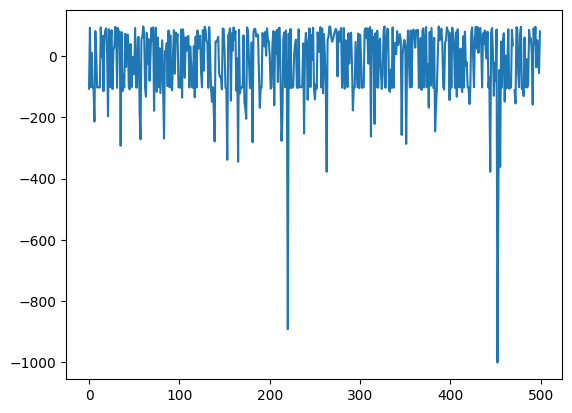

In [108]:
environment = GridWorld()
q_learning_agent = QLearningAgent(env.actions)

reward_per_episode = play(environment, q_learning_agent, trials=500)

# Simple learning curve
plt.plot(reward_per_episode)

C:\Users\1slav\AppData\Local\Temp\ipykernel_16752\4276647542.py:25: RuntimeWarning: invalid value encountered in double_scalars
  self.q_table[(old_state, action)] = current_q + self.learning_rate * (reward + self.discount_factor * max_new_state_q - current_q)


Mean reward per episode after training:  -inf


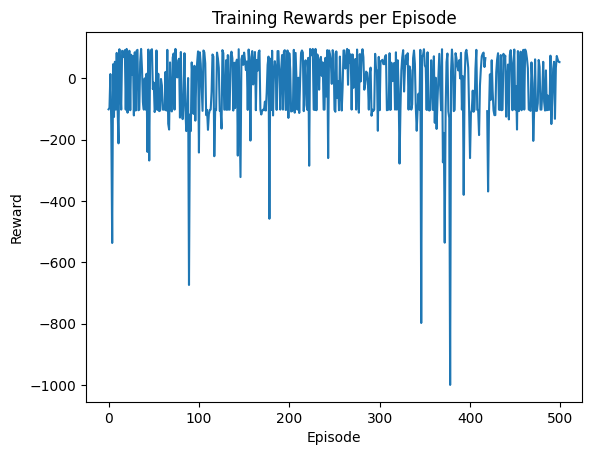

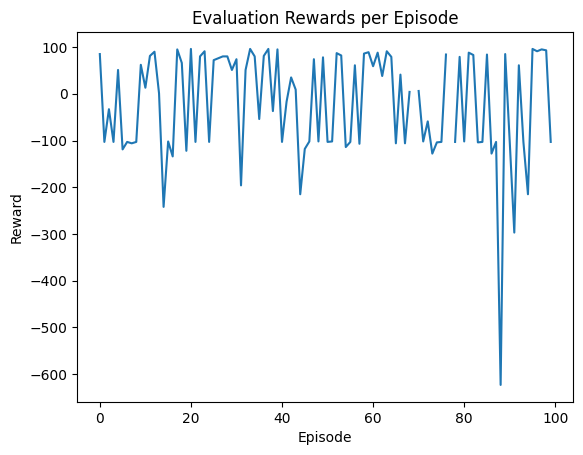

In [109]:
mean_reward, training_rewards, evaluation_rewards = train_and_evaluate(env, q_learning_agent)
print("Mean reward per episode after training: ", mean_reward)

plt.plot(training_rewards)
plt.title("Training Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

plt.plot(evaluation_rewards)
plt.title("Evaluation Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()